# TCW Security Research Environment

### 1. Configurations/ Run Backtest

Set configurations in configs.json and start backtest

In [1]:
# # configs
# {
#     "API_settings": {
#         "snowflake_parameters": {
#             "user": "user",
#             "password": "password"
#         }
#     },
#     "default_weights_constraint": [0.001, 0.05],
#     "trans_cost": 0.001,
#     "portfolio_datasource": {
#         "start_date": "01/01/2018",
#         "end_date": "12/28/2023",
#         "custom_universe": [],
#         "equity_universe": ["S&P 500 EX TOBACCO"],
#         "fixed_income_universe": [],
#         "tcw_universe": [],
#         "sustainable": false
#     },
#     "marketmultiple_datasource": {
#         "filters": {
#             "start_date": "2013-01-01"
#         }
#     },
#     "prices_datasource": {
#         "rebalance": "MONTH",
#         "filters": {
#             "date": {"start_date": "2018-01-01"}
#         },
#         "source": 3,
#         "table_name": "PRICES",
#         "database": "SANDBOX_ESG",
#         "schema": "QUANT_RESEARCH"
#     },
#     "fundamentals_datasource": {
#         "source": 3,
#         "filters": {
#             "calendardate": {"start_date": "2017-01-01"}
#         },
#         "table_name": "FUNDAMENTAL_DATA",
#         "database": "SANDBOX_ESG",
#         "schema": "QUANT_RESEARCH"
#     },
#     "strategies": {
#         "benchmark": {
#             "type": "pick_all",
#             "stop_loss": null,
#             "stop_loss_threshold": 0.1,
#             "window_size": 63,
#             "portfolio_leverage": 1,
#             "return_engine": "log_normal",
#             "risk_engine": "log_normal",
#             "allocation_models": ["equal_weight", "market_weight", "original_weight"]
#         }
#     }
# }

In [1]:
# add quantkit to path
import sys
from pathlib import Path

d = Path().resolve().parent.parent
sys.path.insert(0, str(d))

In [2]:
import pandas as pd
import numpy as np
import quantkit.backtester.runner_backtester as runner
import warnings

warnings.filterwarnings("ignore")

local_configs = "C:\\Users\\bastit\\OneDrive - The TCW Group Inc\\Documents\\quantkit\\configs\\configs_aa.json"

r = runner.Runner()
r.init(local_configs=local_configs)
r.run()

2024-05-30 10:27:01,512  WORKING ON: Start Iterating
2024-05-30 10:27:01,512  WORKING ON: Loading Ticker Parent Issuer Data
2024-05-30 10:27:03,198  WORKING ON: Loading Portfolio Data


NotImplementedError: 

In [3]:
r.portfolio_datasource.df

,DATE,PORTFOLIO,PORTFOLIO_NAME,SECURITY_KEY,PORTFOLIO_WEIGHT,BASE_MKT_VAL,OAS
0,2018-01-31,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34889100,3.437718,8.596379e+11,NaN
1,2018-01-31,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34904300,2.931142,7.329632e+11,NaN
2,2018-01-31,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,33267300,2.795895,6.991433e+11,NaN
3,2018-01-31,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,26672100,2.115147,5.289149e+11,NaN
4,2018-01-31,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34897100,1.782348,4.456949e+11,NaN
...,...,...,...,...,...,...,...
49198,2023-12-28,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34713400,0.015919,6.678331e+09,NaN
49199,2023-12-28,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34161500,0.015772,6.616334e+09,NaN
49200,2023-12-28,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,47942800,0.015555,6.525594e+09,NaN
49201,2023-12-28,S&P 500 EX TOBACCO,S&P 500 EX TOBACCO,34474400,0.013806,5.791866e+09,NaN


## Benchmark - Pick All Strategy

<Figure size 640x480 with 0 Axes>

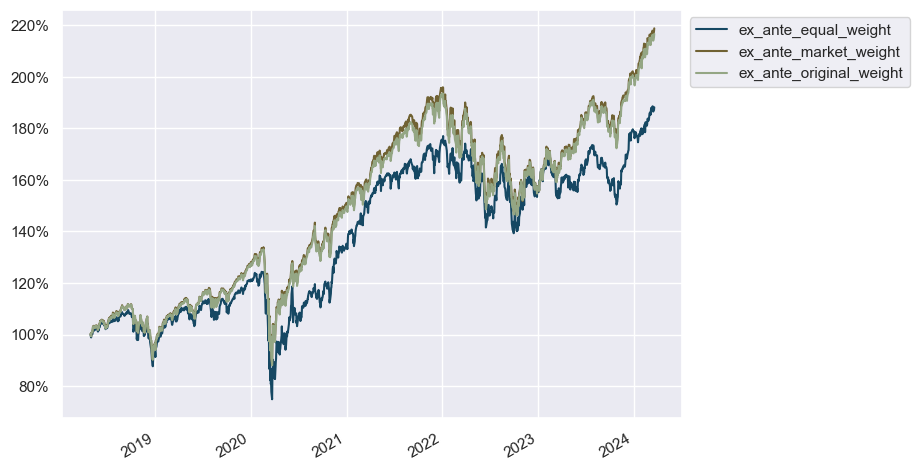

In [4]:
import quantkit.visualization.asset_allocation.returns as returns

returns.strategy_returns(r.strategies["benchmark"].all_portfolios)

In [5]:
equal_weight = (
    r.strategies["benchmark"].allocation_engines_d["equal_weight"].allocations
)
market_weight = (
    r.strategies["benchmark"].allocation_engines_d["market_weight"].allocations
)
original_weight = (
    r.strategies["benchmark"].allocation_engines_d["original_weight"].allocations
)

w = {
    "Equal_Weight": equal_weight[1],
    "Market_Weight": market_weight[1],
    "Original Weight": original_weight[1],
}
df_weights = pd.DataFrame(data=w, index=r.portfolio_datasource.all_tickers)
df_weights = df_weights[df_weights["Equal_Weight"] > 0]

# df_weights

## Strategy

In [6]:
strategy = "benchmark"

### Backtest

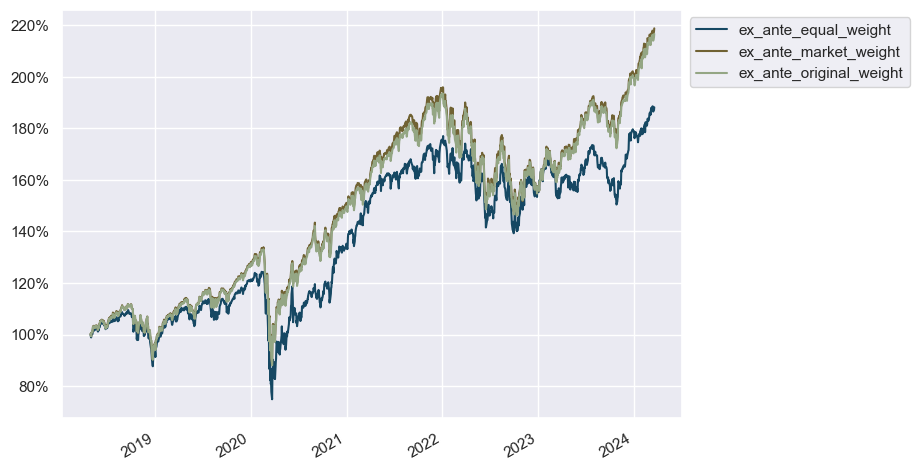

In [7]:
import quantkit.visualization.asset_allocation.returns as returns

returns.strategy_returns(r.strategies[strategy].all_portfolios)

### Statistics vs. Benchmark

,Portfolio,Total Return,CAGR%,Return YTD,Return 1 Year,Return 3 Years,Daily Std Dev,Annualized Std Dev,Sharpe Ratio,Sortino Ratio,VaR,cVaR,Max Drawdown
0,Strategy,118.81%,16.75%,8.55%,34.25%,36.59%,1.31%,20.78%,0.746,1.047,-2.09%,-3.41%,-33.66%
1,Benchmark,116.67%,16.50%,8.31%,33.90%,36.58%,1.29%,20.53%,0.744,1.042,-2.07%,-3.38%,-33.83%


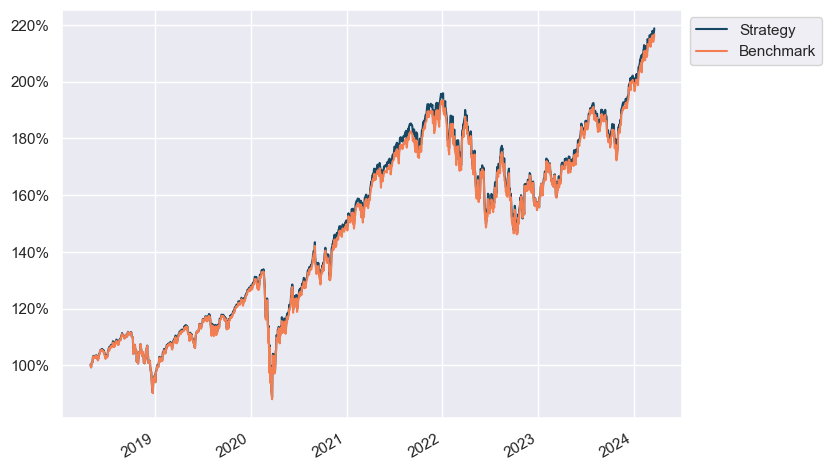

In [8]:
import quantkit.utils.return_statistics as return_statistics
import quantkit.visualization.asset_allocation.returns as returns

benchmark = r.strategies["benchmark"].all_portfolios[
    r.strategies["benchmark"].all_portfolios["portfolio_name"]
    == "ex_ante_original_weight"
]
strat = r.strategies[strategy].all_portfolios[
    r.strategies[strategy].all_portfolios["portfolio_name"] == "ex_ante_market_weight"
]

benchmark["portfolio_name"] = "Benchmark"
strat["portfolio_name"] = "Strategy"


returns.strategy_returns(strat, benchmark=benchmark)

magic_stats = return_statistics.return_stats(strat)
benchmark_stats = return_statistics.return_stats(benchmark)
pd.DataFrame([magic_stats, benchmark_stats])

### Holdings

In [9]:
strategy = "benchmark"

In [10]:
equal_weight = r.strategies[strategy].allocation_engines_d["equal_weight"].allocations
market_weight = r.strategies[strategy].allocation_engines_d["market_weight"].allocations
# c_min_var = r.strategies[strategy].allocation_engines_d["constrained_min_variance"].allocations
# c_mean_var = r.strategies[strategy].allocation_engines_d["constrained_mean_variance"].allocations
# risk_parity = r.strategies[strategy].allocation_engines_d["risk_parity"].allocations
# hrp = r.strategies[strategy].allocation_engines_d["constrained_hrp"].allocations

w = {
    "Equal_Weight": equal_weight[1],
    "Market_Weight": market_weight[1],
    # "Constrained_Min_Variance": c_min_var[1],
    # "Constrained_Mean_Variance": c_mean_var[1],
    # "Risk_Parity": risk_parity[1],
    # "Hierarchical_Risk_Parity": hrp[1],
}
df_weights = pd.DataFrame(data=w, index=r.portfolio_datasource.all_tickers)
df_weights = df_weights[df_weights["Equal_Weight"] > 0]

df_weights

,Equal_Weight,Market_Weight
AAPL,0.001996,0.062457
MSFT,0.001996,0.066073
AMZN,0.001996,0.038839
BRK.B,0.001996,0.019260
META,0.001996,0.026354
...,...,...
VLTO,0.001996,0.000470
HUBB,0.001996,0.000418
UBER,0.001996,0.003678
BLDR,0.001996,0.000500


# 5. Securities

In [11]:
security = "MSFT"

<Axes: >

<Figure size 640x480 with 0 Axes>

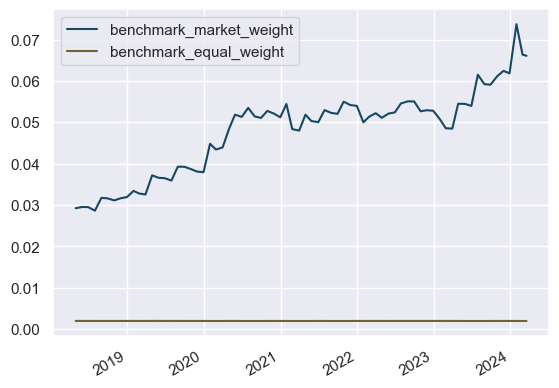

In [12]:
import seaborn as sns

sns.set()
sns.set_style()
sns.despine()
my_palette = [
    "#164863",
    "#706233",
    "#94A684",
    "#427D9D",
    "#B0926A",
    "#AEC3AE",
    "#9BBEC8",
    "#E1C78F",
    "#DDF2FD",
    "#FAE7C9",
    "#FFEEF4",
]
sns.set_palette(my_palette)
r.portfolio_datasource.tickers[security].allocation_df.plot.line(
    y=[
        # f"{strategy}_risk_parity",
        # f"{strategy}_hrp",
        f"{strategy}_market_weight",
        f"{strategy}_equal_weight",
        # f"{strategy}_constrained_min_variance"
    ]
)

# Loading Quandl Data

In [13]:
# import quantkit.handyman.portfolios as portfolios

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# df = portfolios.historical_portfolio_holdings(
#     "2017-01-01",
#     "2024-3-19",
#     equity_universe=[
#         "S & P 500 INDEX",
#         "S&P 500 EX TOBACCO",
#         "Russell 1000",
#         "RUSSELL 1000 GROWTH",
#         "RUSSELL 1000 VALUE",
#         "RUSSELL MIDCAP",
#         "RUSSELL 2000",
#         "RUSSELL 2000 VALUE",
#         "RUSSELL 3000 GROWTH INDEX",
#         "RUSSELL 3000 INDEX",
#     ],
#     local_configs=local_configs
# )
# tickers = list(df["Ticker Cd"].unique())

In [14]:
# import quantkit.utils.snowflake_utils as snowflake_utils

# df2 = snowflake_utils.load_from_snowflake("SANDBOX_ESG", "QUANT_RESEARCH", "PRICES", local_configs=local_configs)
# tickers2 = df2["ticker"].unique()
# tickers.extend(tickers2)
# tickers = list(set(tickers))

In [15]:
# import quantkit.handyman.quandl_data_loader as quandl_data_loader
# import pandas as pd
# import quantkit.utils.snowflake_utils as snowflake_utils

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# df_prices = quandl_data_loader.get_price_data(
#     ticker=tickers,
#     start_date="2013-01-01",
#     end_date="2024-3-19"
# )
# df_fundamental = quandl_data_loader.get_fundamental_data(
#     ticker=tickers,
#     start_date="2013-01-01",
#     end_date="2024-3-19"
# )
# df_prices = df_prices.sort_values(by=["ticker", "date"], ascending=[True, True])
# df_fundamental = df_fundamental.sort_values(by=["ticker", "calendardate"], ascending=[True, True])
# df_fundamental = df_fundamental.drop_duplicates(subset=["ticker", "calendardate"])

In [16]:
# import quantkit.utils.snowflake_utils as snowflake_utils

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# df_fundamental['calendardate'] = df_fundamental['calendardate'].astype(str)
# df_fundamental['lastupdated'] = df_fundamental['lastupdated'].astype(str)
# df_fundamental['datekey'] = df_fundamental['datekey'].astype(str)
# df_fundamental['reportperiod'] = df_fundamental['reportperiod'].astype(str)

# df_prices['date'] = df_prices['date'].astype(str)
# df_prices['lastupdated'] = df_prices['lastupdated'].astype(str)

# snowflake_utils.write_to_snowflake(
#     df_prices,
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="PRICES",
#     local_configs=local_configs)
# snowflake_utils.write_to_snowflake(
#     df_fundamental,
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="FUNDAMENTAL_DATA",
#     local_configs=local_configs)

# Missing Data

In [17]:
# import quantkit.utils.snowflake_utils as snowflake_utils
# import pandas as pd

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# t = pd.DataFrame([{"parent_ticker": "SAVA", "sub_share_ticker": "SAVAW"}])

# snowflake_utils.write_to_snowflake(
#     t,
#     "SANDBOX_ESG",
#     "QUANT_RESEARCH",
#     "TICKER_PARENT_MAPPING",
#     local_configs=local_configs,
#     overwrite=False
#     )

In [18]:
# import quantkit.utils.snowflake_utils as snowflake_utils
# import pandas as pd

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# t = pd.DataFrame([{"ISIN": "US42250P1030", "TICKER": "DOC"}])

# snowflake_utils.write_to_snowflake(
#     t,
#     "SANDBOX_ESG",
#     "QUANT_RESEARCH",
#     "ISIN_TICKER_MAPPING",
#     local_configs=local_configs,
#     overwrite=False
#     )

In [19]:
# missing = ['PEAK']

# df = r.portfolio_datasource.df
# df = df[df["Ticker Cd"].isin(missing)]
# df = df.drop_duplicates(subset=["Ticker Cd"])
# df[["ISIN", "Ticker Cd", "Security_Name"]]

In [20]:
# import quantkit.utils.snowflake_utils as snowflake_utils

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"


# test_p = snowflake_utils.load_from_snowflake(
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="PRICES",
#     local_configs=local_configs)
# test_f = snowflake_utils.load_from_snowflake(
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="FUNDAMENTAL_DATA",
#     local_configs=local_configs)

In [21]:
# ticker = ['DOC']

In [22]:
# import quantkit.handyman.quandl_data_loader as quandl_data_loader

# df_actions = quandl_data_loader.get_company_actions(ticker)
# df_actions.head(20)

In [23]:
# import quantkit.handyman.quandl_data_loader as quandl_data_loader

# df_prices = quandl_data_loader.get_price_data(
#     ticker=ticker,
#     start_date="2013-01-01",
#     end_date="2023-12-28"
# )
# df_fundamental = quandl_data_loader.get_fundamental_data(
#     ticker=ticker,
#     start_date="2013-01-01",
#     end_date="2023-12-28"
# )
# df_prices = df_prices.sort_values(by=["ticker", "date"], ascending=[True, True])
# df_fundamental = df_fundamental.sort_values(by=["ticker", "calendardate"], ascending=[True, True])
# df_fundamental = df_fundamental.drop_duplicates(subset=["ticker", "calendardate"])
# df_fundamental.tail(5)

In [24]:
# test_f[test_f["ticker"].isin(ticker)]

In [25]:
# import quantkit.utils.snowflake_utils as snowflake_utils

# local_configs = "C:\\Users\\bastit\\Documents\\quantkit\\configs\\configs_aa.json"

# df_fundamental['calendardate'] = df_fundamental['calendardate'].astype(str)
# df_fundamental['lastupdated'] = df_fundamental['lastupdated'].astype(str)
# df_fundamental['datekey'] = df_fundamental['datekey'].astype(str)
# df_fundamental['reportperiod'] = df_fundamental['reportperiod'].astype(str)

# df_prices['date'] = df_prices['date'].astype(str)
# df_prices['lastupdated'] = df_prices['lastupdated'].astype(str)

# snowflake_utils.write_to_snowflake(
#     df_prices,
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="PRICES",
#     local_configs=local_configs,
#     overwrite=False
#     )
# snowflake_utils.write_to_snowflake(
#     df_fundamental,
#     schema="QUANT_RESEARCH",
#     database="SANDBOX_ESG",
#     table_name="FUNDAMENTAL_DATA",
#     local_configs=local_configs,
#     overwrite=False
#     )